# d1=3

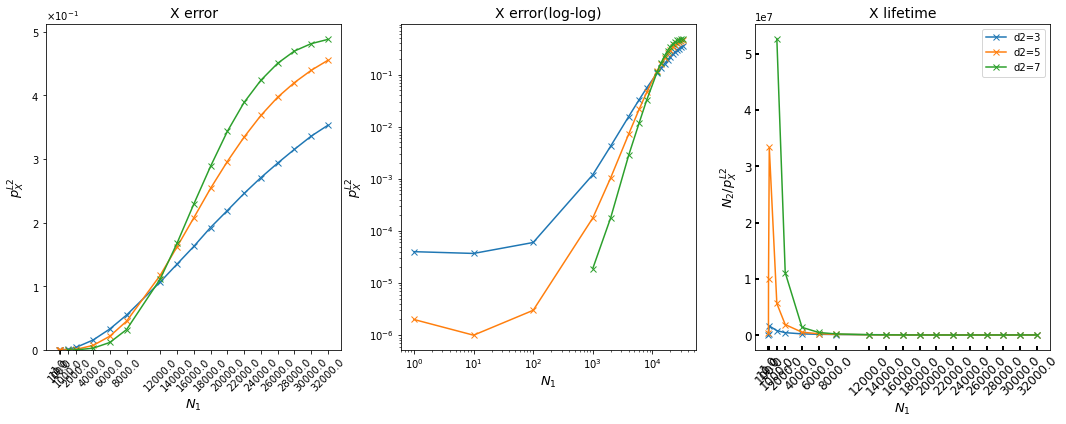

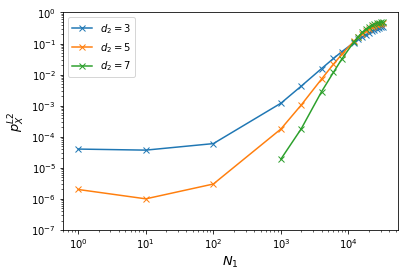

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=3,p=0.0005,eta=1000"

# ファイル名

file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data1.index

# データフレームの列名(リスト)を取得
round_list = data1.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[1].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/b[0:],marker='x',label="d2="+str(code_distance_list[i]))
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
axes[0].set_xticklabels(a, rotation=45)
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_X^{L2}$', fontsize=13)
axes[0].set_title("X error", fontsize=14)
axes[1].set_title("X error(log-log)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[1].set_xticks(a)
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("X lifetime", fontsize=14)
axes[2].set_xticks(a)
axes[2].set_xticklabels(a, rotation=45)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # y軸指数表記
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(1e-7,1)
#ax.set_xticklabels(a, rotation=45)
plt.legend()
plt.show()

[1.84612739]
-8.466607845704704
[2.77179584]
-12.146718351771447
[3.62315901]
-15.651255399514524


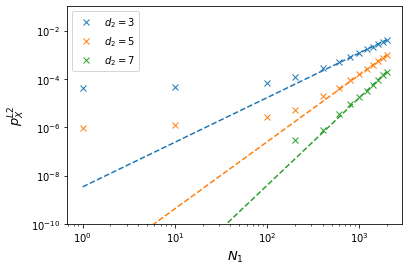

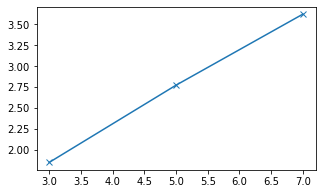

In [9]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    X = np.log10(a).reshape(-1, 1)
    Y = np.log10(b)
    clf.fit(X[-5:], Y[-5:])
    print(clf.coef_)
    print(clf.intercept_)
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
    ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000000001, 0.1)
ax.legend()

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot([3,5,7], [1.84612739,2.77179584,3.62315901],marker='x')

[  272.37566051  2641.37985684 19174.35238625 28593.07761591
 35653.80158659 36690.06677592 35904.06434008 34626.15867783
 33263.9410563  31938.38629022 30574.61160689 29455.65941403
 28407.961047  ]
[  549.0583649   5286.80941052 36568.41951291 50865.99354002
 56223.20612833 52572.0894777  47392.24189    42108.9864788
 37514.18505122 33723.23820168 30592.55874249 28062.8670584
 25864.92302599]
[  1525.78577968  14594.27904262  89928.05755396 115426.79055809
 109893.12893211  91118.94059045  73265.44069163  59891.71577787
  49300.5484686   41445.13256522  35374.82948227  30634.6999246
  26950.10995645]


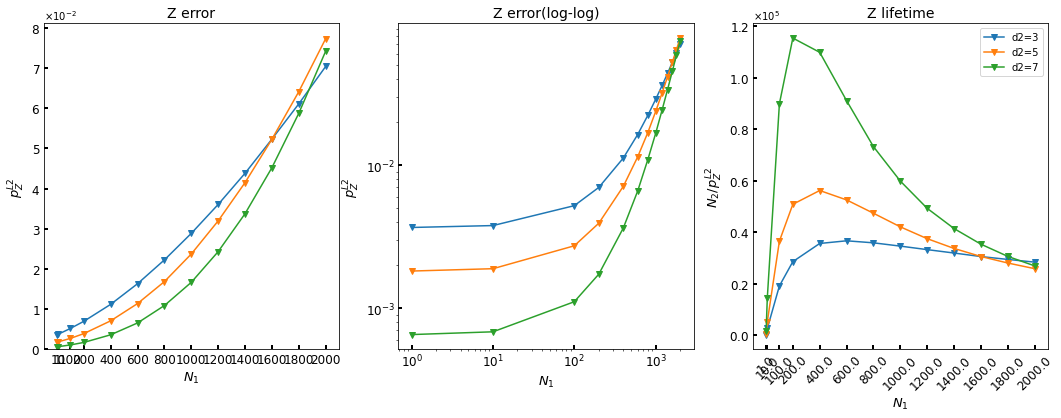

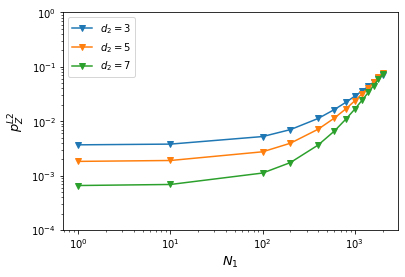

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=3,p=0.0005,eta=1000"

# ファイル名
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=10000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
round_list = data2.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[1].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    print(a[0:]/b[0:])
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
#xes[0].set_xticklabels(a, rotation=45)
axes[2].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[2].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_Z^{L2}$', fontsize=13)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[0].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[0].set_title("Z error", fontsize=14)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[1].set_title("Z error(log-log)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[2].set_xscale("log")
#axes[2].set_yscale("log")
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("Z lifetime", fontsize=14)
axes[2].set_xticks(a)
axes[2].set_xticklabels(a, rotation=45)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-4,1e-0)
plt.legend()
plt.show()

[1.31047109]
-5.479472789093104
[1.7274598]
-6.815512201061145
[2.18481354]
-8.343181034860732


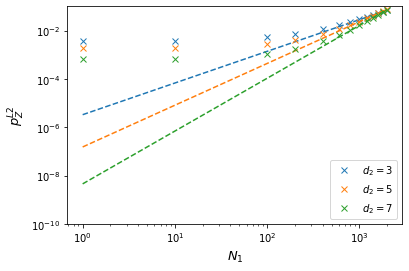

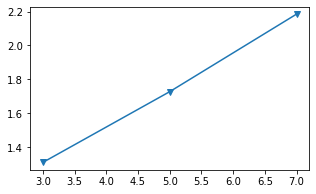

In [12]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    X = np.log10(a).reshape(-1, 1)
    Y = np.log10(b)
    clf.fit(X[-5:], Y[-5:])
    print(clf.coef_)
    print(clf.intercept_)
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
    ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000000001, 0.1)
ax.legend()

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot([3,5,7], [1.31047109,1.7274598,2.18481354],marker='v')

662806.0563070226 662806.0563070226
1695832.4548457374 1695832.4548457374
4900444.393143648 4900444.393143648


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_85152/23444336.py:47: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)


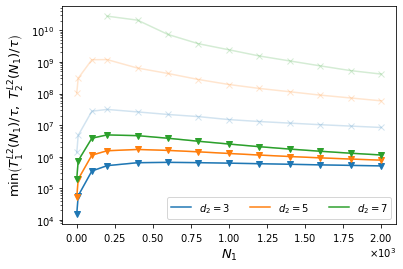

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=3,p=0.0005,eta=1000"

# ファイル名
file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=10000000,ver1" + ".csv"
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=10000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*3+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        #b = np.array(data1.loc[code_distance_list1[i]])
        #axes.plot(a[9:], code_distance_list1[i]*(6*a[9:]+4*3+1)/b[9:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c, code_distance_list2[i]*(6*c+4*3+1)/d,marker='v',color = cm(i))
        #axes.plot((c[8],a[9]), (code_distance_list1[i]*(6*c[8]+4*3+1)/d[8],code_distance_list1[i]*(6*a[9]+4*3+1)/b[9]),marker='',color = cm(i))
        print(code_distance_list2[i]*(6*c[5]+4*3+1)/d[5], code_distance_list2[i]*(6*c[5]+4*3+1)/d[5])
    if i == 1:
        #b = np.array(data1.loc[code_distance_list1[i]])
        #axes.plot(a[6:], code_distance_list1[i]*(6*a[6:]+4*3+1)/b[6:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c, code_distance_list2[i]*(6*c+4*3+1)/d,marker='v',color = cm(i))
        #axes.plot((c[5],a[6]), (code_distance_list2[i]*(6*c[5]+4*3+1)/d[5],code_distance_list2[i]*(6*a[6]+4*3+1)/b[6]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[4]+4*3+1)/d[4], code_distance_list1[i]*(6*c[4]+4*3+1)/d[4])
    if i == 2:
        #b = np.array(data1.loc[code_distance_list1[i]])
        #axes.plot(a[2:], code_distance_list1[i]*(6*a[2:]+4*3+1)/b[2:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c, code_distance_list2[i]*(6*c+4*3+1)/d,marker='v',color = cm(i))
        #axes.plot((c[1],a[2]), (code_distance_list2[i]*(6*c[1]+4*3+1)/d[1],code_distance_list2[i]*(6*a[2]+4*3+1)/b[2]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[3]+4*3+1)/d[3], code_distance_list1[i]*(6*c[3]+4*3+1)/d[3])

plt.plot([], [], label = r"$d_2=3$", color = cm(0)) #凡例Aのダミープロット
plt.plot([], [], label = r"$d_2=5$", color = cm(1)) #凡例Bのダミープロット
plt.plot([], [], label = r"$d_2=7$", color = cm(2)) #凡例Bのダミープロット
    
axes.set_xlabel(r'$N_1$', fontsize=13)
axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#axes.set_xticks(a)
#axes.set_xticklabels(a, rotation=45)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
#axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,2000)
#axes.set_xscale("log")
axes.set_yscale("log")
plt.legend(ncol=3,loc='lower right')
plt.show()

662806.0563070226 331.4030281535113
1695832.4548457374 847.9162274228687
4900444.393143648 2450.222196571824


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_85152/3658348961.py:47: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)


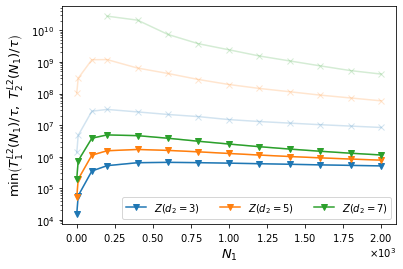

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=3,p=0.0005,eta=1000"

# ファイル名
file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=10000000,ver1" + ".csv"
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=10000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*3+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        #b = np.array(data1.loc[code_distance_list1[i]])
        #axes.plot(a[9:], code_distance_list1[i]*(6*a[9:]+4*3+1)/b[9:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c, code_distance_list2[i]*(6*c+4*3+1)/d,marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        #axes.plot((c[8],a[9]), (code_distance_list1[i]*(6*c[8]+4*3+1)/d[8],code_distance_list1[i]*(6*a[9]+4*3+1)/b[9]),marker='',color = cm(i))
        print(code_distance_list2[i]*(6*c[5]+4*3+1)/d[5], code_distance_list2[i]*(6*c[5]+4*3+1)/d[5]/2000)
    if i == 1:
        #b = np.array(data1.loc[code_distance_list1[i]])
        #axes.plot(a[6:], code_distance_list1[i]*(6*a[6:]+4*3+1)/b[6:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c, code_distance_list2[i]*(6*c+4*3+1)/d,marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        #axes.plot((c[5],a[6]), (code_distance_list2[i]*(6*c[5]+4*3+1)/d[5],code_distance_list2[i]*(6*a[6]+4*3+1)/b[6]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[4]+4*3+1)/d[4], code_distance_list1[i]*(6*c[4]+4*3+1)/d[4]/2000)
    if i == 2:
        #b = np.array(data1.loc[code_distance_list1[i]])
        #axes.plot(a[2:], code_distance_list1[i]*(6*a[2:]+4*3+1)/b[2:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c, code_distance_list2[i]*(6*c+4*3+1)/d,marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        #axes.plot((c[1],a[2]), (code_distance_list2[i]*(6*c[1]+4*3+1)/d[1],code_distance_list2[i]*(6*a[2]+4*3+1)/b[2]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[3]+4*3+1)/d[3], code_distance_list1[i]*(6*c[3]+4*3+1)/d[3]/2000)
    
axes.set_xlabel(r'$N_1$', fontsize=13)
axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#axes.set_xticks(a)
#axes.set_xticklabels(a, rotation=45)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
#axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,2000)
#axes.set_xscale("log")
axes.set_yscale("log")
plt.legend(ncol=3,loc='lower right')
plt.show()

[ 77. 229. 461.]


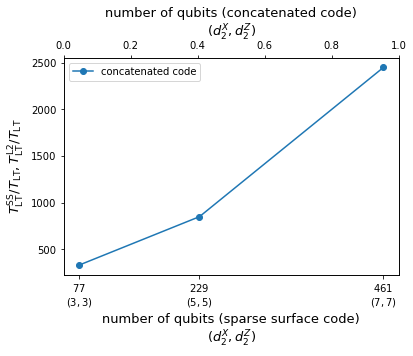

In [9]:
cd_list =[[3,3],[5,5],[7,7]]
lifetime_list = np.array([662806.0563070226,1695832.4548457374,4900444.393143648])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
fig, ax = plt.subplots()
print(number_list)
ax2 = ax.twiny()
ax.plot(number_list, lifetime_list/2000,marker='o',label="concatenated code")
#ax.plot([65,117,169,221,393,485,557], 
        #np.array([3.51509345e+04, 1.05939886e+06, 2.68201630e+07, 2.20340540e+08,
 #6.23562169e+08, 1.37817323e+10, 4.85916186e+10])/10000,marker='o',label="sparse surface code")
ax.set_xlabel(r"number of qubits (sparse surface code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{SS}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
ax.set_xticks([77,229,461])
ax.set_xticklabels([r"$77$"+"\n"+r"$(3,3)$",r"$229$"+"\n"+r"$(5,5)$",r"$461$"+"\n"+r"$(7,7)$"])
#ax2.set_xticks(number_list)
#ax2.set_xticklabels([r"$77$"+"\n"+r"$(3,3)$",r"$129$"+"\n"+r"$(3,5)$",r"$229$"+"\n"+r"$(5,5)$",r"$321$"+"\n"+r"$(5,7)$",r"$461$"+"\n"+r"$(7,7)$"])
#ax.set_yscale("log")
#ax.set_xlim(40,600)
#ax2.set_xlim(40,600)
ax.legend()
plt.show()

In [82]:
d1 = 3

d2 = 3
N1 = 500
pL = 2.3000000000000014e-05
print(d2*(6*N1+4*d1+1)/pL)

d2 = 5
N1 = 1500
pL = 3e-06
print(d2*(6*N1+4*d1+1)/pL)

392999999.99999976
15021666666.666666


# d1 = 5

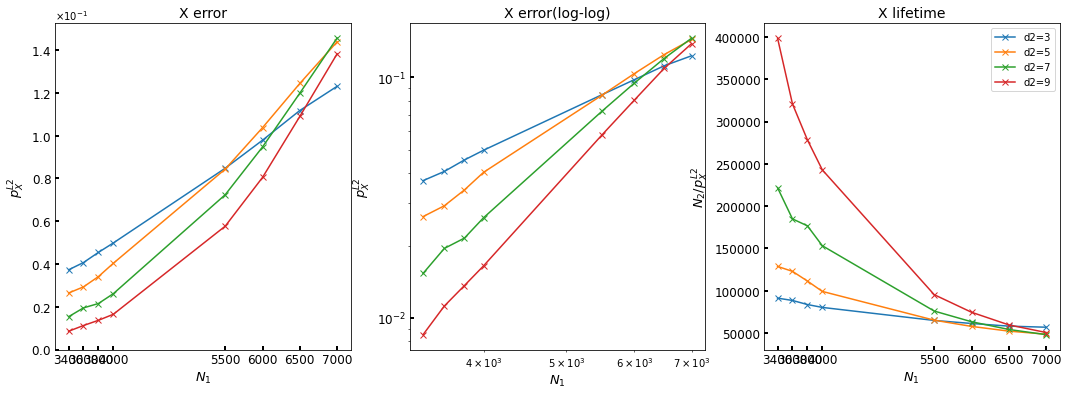

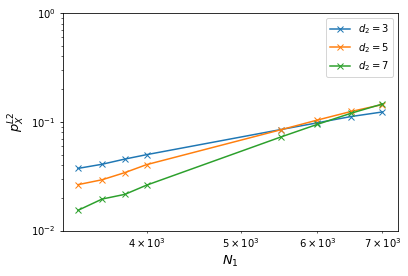

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0005,eta=1000"

# ファイル名

file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
#file1 = "X error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver0" + ".csv"
file1 = "X error,p=0.0005,d2=(3,9,2),eta=1000,trials=100000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data1.index

# データフレームの列名(リスト)を取得
round_list = data1.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[1].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/b[0:],marker='x',label="d2="+str(code_distance_list[i]))
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_X^{L2}$', fontsize=13)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[0].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[0].set_title("X error", fontsize=14)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[1].set_title("X error(log-log)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[1].set_xticks(a)
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("X lifetime", fontsize=14)
axes[2].set_xticks(a)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data1.loc[code_distance_list[i]])
    ax.plot(a[0:], b[0:],marker='x',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#ax.set_xticks(a[:8])
#ax.set_xticklabels(a, rotation=45)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-2,1e-0)
plt.legend()
plt.show()

[1.79481444]
-7.766594471496098
[2.6969178]
-11.105488665700234
[3.50774121]
-14.19889758149956


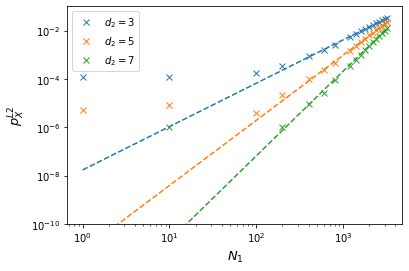

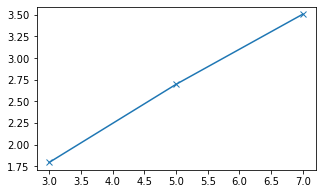

In [16]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    X = np.log10(a).reshape(-1, 1)
    Y = np.log10(b)
    clf.fit(X[-5:], Y[-5:])
    print(clf.coef_)
    print(clf.intercept_)
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
    ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.0000000001, 0.1)
ax.legend()

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot([3,5,7], [1.79481444,2.6969178,3.50774121],marker='x')

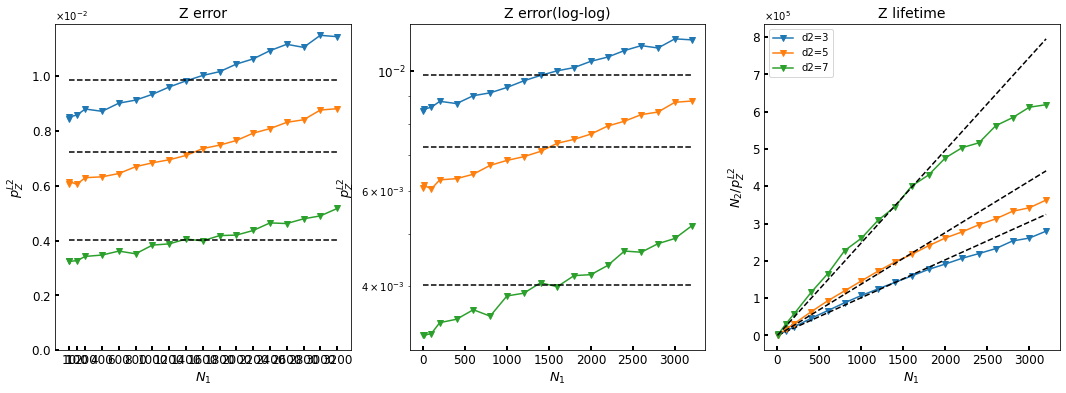

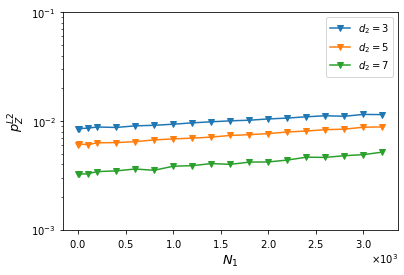

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0005,eta=1000"

# ファイル名
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
#file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=10000000,ver_final" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
round_list = data2.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[0].plot((a[0],a[-1]), (np.mean(b),np.mean(b)),marker='',color="k", linestyle = "dashed")
    axes[1].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[1].plot((a[0],a[-1]), (np.mean(b),np.mean(b)),marker='',color="k", linestyle = "dashed")
    axes[2].plot(a[0:], a[0:]/b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/np.mean(b),marker='',color="k", linestyle = "dashed")
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
axes[2].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[2].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_Z^{L2}$', fontsize=13)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[0].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[0].set_title("Z error", fontsize=14)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[1].set_title("Z error(log-log)", fontsize=14)
#axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[2].set_xscale("log")
#axes[2].set_yscale("log")
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("Z lifetime", fontsize=14)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_yscale("log")
ax.set_ylim(1e-3,1e-1)
plt.legend()
plt.show()

2816013.185288019 1408.0065926440095
[   9585.79881657   28547.93233083  217056.97308634  416108.14495059
  833008.37251979 1204724.40944883 1584465.38124454 1934147.12495987
 2254918.28874781 2569728.41013124 2878240.92540888 3193291.36336812
 3453318.01206553 3730530.47404067 3957102.35068146 4197313.03179583
 4565547.81507287 4704403.06300039 5038710.24117446] [   9585.79881657   28547.93233083  217056.97308634  416108.14495059
  833008.37251979 1204724.40944883 1584465.38124454 1934147.12495987
 2254918.28874781 2569728.41013124 2878240.92540888 3193291.36336812
 3453318.01206553 3730530.47404067 3957102.35068146 4197313.03179583
 4565547.81507287 4704403.06300039 5038710.24117446]
7067039.10614532 3533.51955307266
21182650.49210394 10591.32524605197
10892729.922279881


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_85152/4239347513.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',color = cm(i),alpha=0.2)


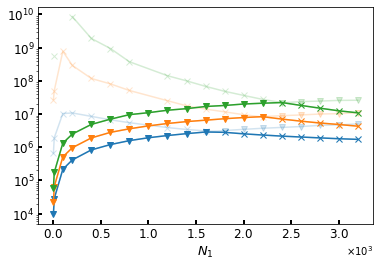

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0005,eta=1000"

# ファイル名
file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*5+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[10:], code_distance_list1[i]*(6*a[10:]+4*5+1)/b[10:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:11], code_distance_list1[i]*(6*c[:11]+4*5+1)/d[:11],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[10],a[10]), (code_distance_list1[i]*(6*c[10]+4*5+1)/d[10],code_distance_list1[i]*(6*a[10]+4*5+1)/b[10]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[10]+4*5+1)/b[10], code_distance_list1[i]*(6*a[10]+4*5+1)/b[10]/(2*10**3))
        print(code_distance_list1[i]*(6*c+4*5+1)/d, code_distance_list1[i]*(6*c+4*5+1)/d)
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[13:], code_distance_list1[i]*(6*a[13:]+4*5+1)/b[13:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:14], code_distance_list1[i]*(6*c[:14]+4*5+1)/d[:14],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[13],a[13]), (code_distance_list1[i]*(6*c[13]+4*5+1)/d[13],code_distance_list1[i]*(6*a[13]+4*5+1)/b[13]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[13]+4*5+1)/b[13], code_distance_list1[i]*(6*a[13]+4*5+1)/b[13]/(2*10**3))
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[13:], code_distance_list1[i]*(6*a[13:]+4*5+1)/b[13:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:14], code_distance_list1[i]*(6*c[:14]+4*5+1)/d[:14],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[13],a[13]), (code_distance_list1[i]*(6*c[13]+4*5+1)/d[13],code_distance_list1[i]*(6*a[13]+4*5+1)/b[13]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[13]+4*5+1)/d[13], code_distance_list1[i]*(6*c[13]+4*5+1)/d[13]/(2*10**3))
        print(code_distance_list1[2]*(6*a[-1]+4*5+1)/b[-1]) # (7,5)

axes.set_xlabel(r'$N_1$', fontsize=13)
#axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes.set_yscale("log")
#plt.legend()
plt.show()

2816013.185288019 1408.0065926440095
[   9585.79881657   28547.93233083  217056.97308634  416108.14495059
  833008.37251979 1204724.40944883 1584465.38124454 1934147.12495987
 2254918.28874781 2569728.41013124 2878240.92540888 3193291.36336812
 3453318.01206553 3730530.47404067 3957102.35068146 4197313.03179583
 4565547.81507287 4704403.06300039 5038710.24117446] [   9585.79881657   28547.93233083  217056.97308634  416108.14495059
  833008.37251979 1204724.40944883 1584465.38124454 1934147.12495987
 2254918.28874781 2569728.41013124 2878240.92540888 3193291.36336812
 3453318.01206553 3730530.47404067 3957102.35068146 4197313.03179583
 4565547.81507287 4704403.06300039 5038710.24117446]
7067039.10614532 3533.51955307266
21182650.49210394 10591.32524605197
10892729.922279881


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_356/4018588998.py:46: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',color = cm(i),alpha=0.2)


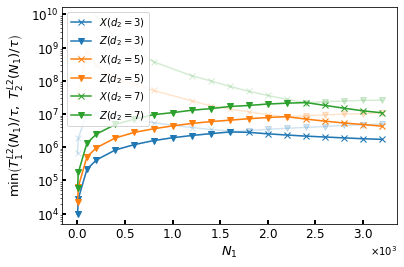

In [68]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0005,eta=1000"

# ファイル名
file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*5+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[10:], code_distance_list1[i]*(6*a[10:]+4*5+1)/b[10:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:11], code_distance_list1[i]*(6*c[:11]+4*5+1)/d[:11],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[10],a[10]), (code_distance_list1[i]*(6*c[10]+4*5+1)/d[10],code_distance_list1[i]*(6*a[10]+4*5+1)/b[10]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[10]+4*5+1)/b[10], code_distance_list1[i]*(6*a[10]+4*5+1)/b[10]/(2*10**3))
        print(code_distance_list1[i]*(6*c+4*5+1)/d, code_distance_list1[i]*(6*c+4*5+1)/d)
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[13:], code_distance_list1[i]*(6*a[13:]+4*5+1)/b[13:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:14], code_distance_list1[i]*(6*c[:14]+4*5+1)/d[:14],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[13],a[13]), (code_distance_list1[i]*(6*c[13]+4*5+1)/d[13],code_distance_list1[i]*(6*a[13]+4*5+1)/b[13]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[13]+4*5+1)/b[13], code_distance_list1[i]*(6*a[13]+4*5+1)/b[13]/(2*10**3))
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[13:], code_distance_list1[i]*(6*a[13:]+4*5+1)/b[13:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:14], code_distance_list1[i]*(6*c[:14]+4*5+1)/d[:14],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[13],a[13]), (code_distance_list1[i]*(6*c[13]+4*5+1)/d[13],code_distance_list1[i]*(6*a[13]+4*5+1)/b[13]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[13]+4*5+1)/d[13], code_distance_list1[i]*(6*c[13]+4*5+1)/d[13]/(2*10**3))
        print(code_distance_list1[2]*(6*a[-1]+4*5+1)/b[-1]) # (7,5)

axes.set_xlabel(r'$N_1$', fontsize=13)
axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes.set_yscale("log")
plt.legend()
plt.show()

[   24938.42364532    74953.73226404   570073.4394125   1070113.93514464
  2091275.5542759   3003317.66657459  4109974.42455255  4708811.26173109
  5581808.81216196  6227015.03574085  7232022.04961181  7758843.21223728
  8584384.67031679  9078278.78233026  9311881.18811901 10136924.07527602
 10524087.5912411  11028763.76989006 11149071.92575428]
10892729.922279881
[137. 245. 409. 589. 825.]


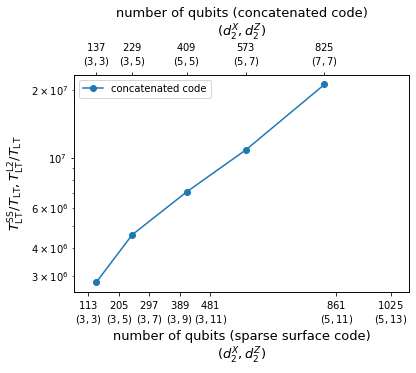

In [63]:
print(code_distance_list1[0]*(6*c+4*5+1)/d) # (5,3)

cd_list =[[3,3],[5,3],[5,5],[7,5],[7,7]]
lifetime_list = np.array([2816013.185288019,4565547.81507287,7067039.10614532,10892729.922279881,21182650.49210394])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(5,cd[0],cd[1]))
print(number_list)
fig, ax = plt.subplots()
ax2 = ax.twiny()
ax.plot(number_list, lifetime_list,marker='o',label="concatenated code")
#ax.plot([113,205,297,389,481,861,1025], 
        #np.array([4.10502339e+04, 7.14762971e+05, 1.04541262e+07, 1.40420291e+08,3.43426440e+08, 1.79298933e+09, 2.21373703e+10])/10000,marker='o',label="sparse surface code")
ax.set_xlabel(r"number of qubits (sparse surface code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{SS}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
ax.set_xticks([113,205,297,389,481,861,1025])
ax.set_xticklabels([r"$113$"+"\n"+r"$(3,3)$",r"$205$"+"\n"+r"$(3,5)$",r"$297$"+"\n"+r"$(3,7)$",r"$389$"+"\n"+r"$(3,9)$",
                    r"$481$"+"\n"+r"$(3,11)$",r"$861$"+"\n"+r"$(5,11)$",r"$1025$"+"\n"+r"$(5,13)$"])
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$137$"+"\n"+r"$(3,3)$",r"$229$"+"\n"+r"$(3,5)$",r"$409$"+"\n"+r"$(5,5)$",r"$573$"+"\n"+r"$(5,7)$",r"$825$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(70,1080)
ax2.set_xlim(70,1080)
ax.legend()
plt.show()

In [75]:
d1 = 5
d2 = 5
N1 = 400
pL = 5.680000000000015e-05
print(d2*(6*N1+4*d1+1)/pL)

d2 = 7
N1 = 600
pL = 5.800000000000002e-06
print(d2*(6*N1+4*d1+1)/pL)

213116197.18309805
4370172413.793102


# d1 = 7

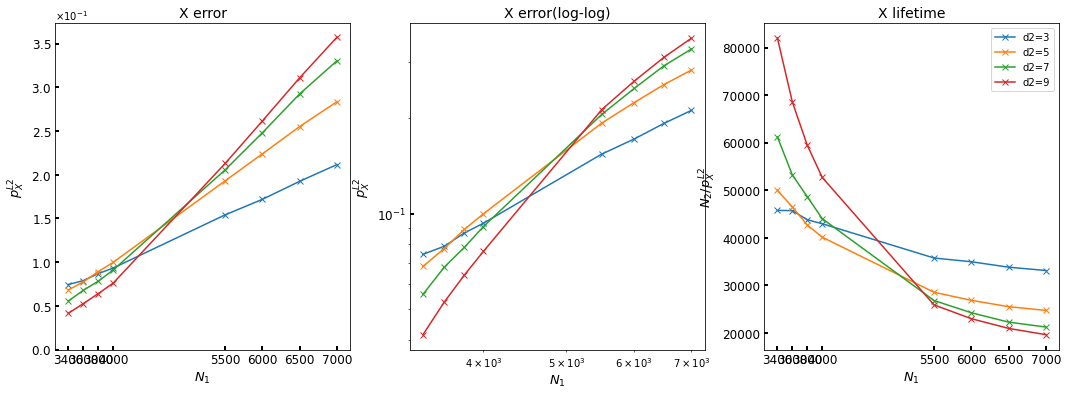

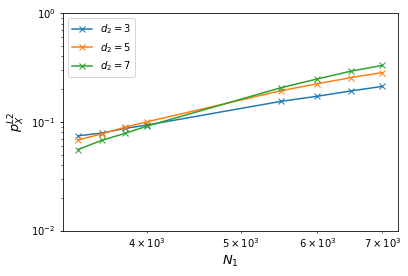

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=7,p=0.0005,eta=1000"

# ファイル名

file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
file1 = "X error,p=0.0005,d2=(3,9,2),eta=1000,trials=100000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data1.index

# データフレームの列名(リスト)を取得
round_list = data1.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data1.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[1].plot(a[0:], b[0:],marker='x',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/b[0:],marker='x',label="d2="+str(code_distance_list[i]))
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_X^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_X^{L2}$', fontsize=13)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[0].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[0].set_title("X error", fontsize=14)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[1].set_title("X error(log-log)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[1].set_xticks(a)
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("X lifetime", fontsize=14)
axes[2].set_xticks(a)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data1.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-2,1e-0)
plt.legend()
plt.show()

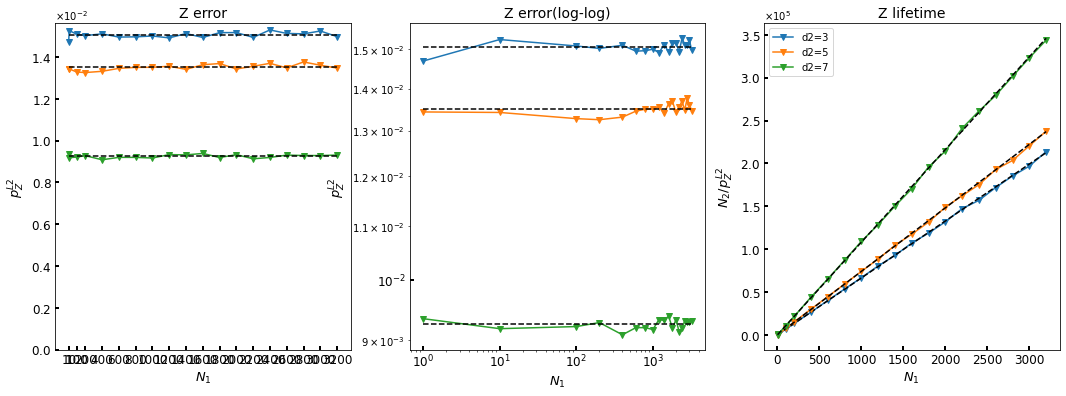

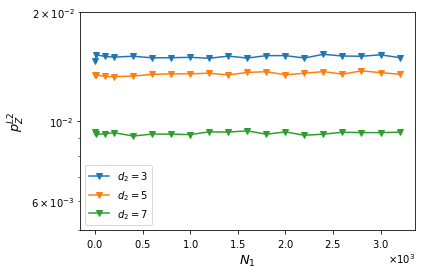

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=7,p=0.0005,eta=1000"

# ファイル名
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
#file2 = "Z error,p=0.0001,d2=(3,7,2),eta=1000,trials=100000,ver2" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0).replace(0, np.nan)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
round_list = data2.columns

##### グラフ作成 #####

a = np.array(round_list)
a = [float(num) for num in a]
a = np.array(a)

fig, axes = plt.subplots(1,3,figsize=(18,6))
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    axes[0].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[0].plot((a[0],a[-1]), (np.mean(b),np.mean(b)),marker='',color="k", linestyle = "dashed")
    axes[1].plot(a[0:], b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[1].plot((a[0],a[-1]), (np.mean(b),np.mean(b)),marker='',color="k", linestyle = "dashed")
    axes[2].plot(a[0:], a[0:]/b[0:],marker='v',label="d2="+str(code_distance_list[i]))
    axes[2].plot(a[0:], a[0:]/np.mean(b),marker='',color="k", linestyle = "dashed")
axes[0].set_xlabel(r"$N_1$", fontsize=13)
axes[0].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[0].set_ylim(0,)
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[0].set_xticks(a)
axes[2].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[2].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
axes[1].set_xlabel(r"$N_1$", fontsize=13)
axes[1].set_ylabel(r'$p_Z^{L2}$', fontsize=13)
axes[2].set_xlabel(r"$N_1$", fontsize=13)
axes[2].set_ylabel(r'$N_2/p_Z^{L2}$', fontsize=13)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[0].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[0].set_title("Z error", fontsize=14)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[1].set_title("Z error(log-log)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
#axes[2].set_xscale("log")
#axes[2].set_yscale("log")
axes[2].tick_params(direction="in", width=2, length=4, labelsize=12)
axes[2].set_title("Z lifetime", fontsize=14)
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_2=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$N_1$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_yscale("log")
ax.set_ylim(5*1e-3,2*1e-2)
plt.legend()
plt.show()

1680422.647527922 1680422.647527922
2656425.702811263 2656425.702811263
3142803.8777032304 3142803.8777032304
5266442.806044275 5266442.806044275
9094178.637001935 9094178.637001935


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_85152/702892558.py:48: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*7+1)/b,marker='x',color = cm(i),alpha=0.2)


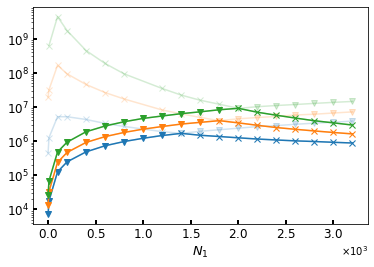

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=7,p=0.0005,eta=1000"

# ファイル名
file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)


cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*7+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*7+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[8:], code_distance_list1[i]*(6*a[8:]+4*7+1)/b[8:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:9], code_distance_list1[i]*(6*c[:9]+4*7+1)/d[:9],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[8],a[8]), (code_distance_list1[i]*(6*c[8]+4*7+1)/d[6],code_distance_list1[i]*(6*a[8]+4*7+1)/b[8]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[8]+4*7+1)/b[8], code_distance_list1[i]*(6*a[8]+4*7+1)/b[8])
        print(code_distance_list1[i]*(6*c[13]+4*7+1)/d[13], code_distance_list1[i]*(6*c[13]+4*7+1)/d[13]) # (5,3)
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[10:], code_distance_list1[i]*(6*a[10:]+4*7+1)/b[10:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:11], code_distance_list1[i]*(6*c[:11]+4*7+1)/d[:11],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[10],a[10]), (code_distance_list1[i]*(6*c[10]+4*7+1)/d[10],code_distance_list1[i]*(6*a[10]+4*7+1)/b[10]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[9]+4*7+1)/d[9], code_distance_list1[i]*(6*c[9]+4*7+1)/d[9])
        print(code_distance_list1[i]*(6*c[-5]+4*7+1)/d[-5], code_distance_list1[i]*(6*c[-5]+4*7+1)/d[-5]) # (7,5)
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[11:], code_distance_list1[i]*(6*a[11:]+4*7+1)/b[11:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:12], code_distance_list1[i]*(6*c[:12]+4*7+1)/d[:12],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[11],a[11]), (code_distance_list1[i]*(6*c[11]+4*7+1)/d[11],code_distance_list1[i]*(6*a[11]+4*7+1)/b[11]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[11]+4*7+1)/b[11], code_distance_list1[i]*(6*a[11]+4*7+1)/b[11])

axes.set_xlabel(r'$N_1$', fontsize=13)
#axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes.set_yscale("log")
#plt.legend()
plt.show()

1680422.647527922 840.211323763961
2656425.702811263 1328.2128514056315
3142803.8777032304 1571.4019388516151
5266442.806044275 2633.2214030221376
9094178.637001935 4547.089318500968


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_356/3408279044.py:48: RuntimeWarning: divide by zero encountered in true_divide
  axes.plot(a, code_distance_list1[i]*(6*a+4*7+1)/b,marker='x',color = cm(i),alpha=0.2)


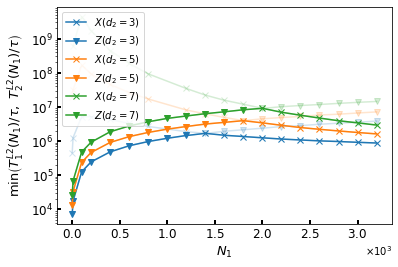

In [67]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=7,p=0.0005,eta=1000"

# ファイル名
file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)


cm = plt.get_cmap("tab10")

fig, axes = plt.subplots()
for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes.plot(a, code_distance_list1[i]*(6*a+4*7+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes.plot(c, code_distance_list1[i]*(6*c+4*7+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[8:], code_distance_list1[i]*(6*a[8:]+4*7+1)/b[8:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:9], code_distance_list1[i]*(6*c[:9]+4*7+1)/d[:9],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[8],a[8]), (code_distance_list1[i]*(6*c[8]+4*7+1)/d[6],code_distance_list1[i]*(6*a[8]+4*7+1)/b[8]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[8]+4*7+1)/b[8], code_distance_list1[i]*(6*a[8]+4*7+1)/b[8]/(2*10**3))
        print(code_distance_list1[i]*(6*c[13]+4*7+1)/d[13], code_distance_list1[i]*(6*c[13]+4*7+1)/d[13]/(2*10**3)) # (5,3)
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[10:], code_distance_list1[i]*(6*a[10:]+4*7+1)/b[10:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:11], code_distance_list1[i]*(6*c[:11]+4*7+1)/d[:11],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[10],a[10]), (code_distance_list1[i]*(6*c[10]+4*7+1)/d[10],code_distance_list1[i]*(6*a[10]+4*7+1)/b[10]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[9]+4*7+1)/d[9], code_distance_list1[i]*(6*c[9]+4*7+1)/d[9]/(2*10**3))
        print(code_distance_list1[i]*(6*c[-5]+4*7+1)/d[-5], code_distance_list1[i]*(6*c[-5]+4*7+1)/d[-5]/(2*10**3)) # (7,5)
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes.plot(a[11:], code_distance_list1[i]*(6*a[11:]+4*7+1)/b[11:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes.plot(c[:12], code_distance_list1[i]*(6*c[:12]+4*7+1)/d[:12],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes.plot((c[11],a[11]), (code_distance_list1[i]*(6*c[11]+4*7+1)/d[11],code_distance_list1[i]*(6*a[11]+4*7+1)/b[11]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[11]+4*7+1)/b[11], code_distance_list1[i]*(6*a[11]+4*7+1)/b[11]/(2*10**3))

axes.set_xlabel(r'$N_1$', fontsize=13)
axes.set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes.set_yscale("log")
plt.legend()
plt.show()

[ 197.  353.  589.  849. 1189.]


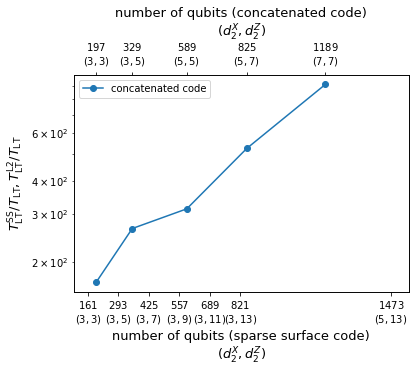

In [65]:
cd_list =[[3,3],[5,3],[5,5],[7,5],[7,7]]
lifetime_list = np.array([1680422.647527922,2656425.702811263,3142803.8777032304,5266442.806044275,9094178.637001935])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(7,cd[0],cd[1]))
print(number_list)
fig, ax = plt.subplots()
ax2 = ax.twiny()
ax.plot(number_list, lifetime_list/10000,marker='o',label="concatenated code")
#ax.plot([161,293,425,557,689,821,1473], 
        #np.array([4.36000633e+04, 4.33196741e+05, 3.61545140e+06, 2.77112623e+07,2.01909055e+08,4.18860000e+08,1.42251147e+09])/10000,marker='o',label="sparse surface code")
ax.set_xlabel(r"number of qubits (sparse surface code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{SS}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
ax.set_xticks([161,293,425,557,689,821,1473])
ax.set_xticklabels([r"$161$"+"\n"+r"$(3,3)$",r"$293$"+"\n"+r"$(3,5)$",r"$425$"+"\n"+r"$(3,7)$",r"$557$"+"\n"+r"$(3,9)$",
                    r"$689$"+"\n"+r"$(3,11)$",r"$821$"+"\n"+r"$(3,13)$",r"$1473$"+"\n"+r"$(5,13)$"])
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$197$"+"\n"+r"$(3,3)$",r"$329$"+"\n"+r"$(3,5)$",r"$589$"+"\n"+r"$(5,5)$",r"$825$"+"\n"+r"$(5,7)$",r"$1189$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(100,1550)
ax2.set_xlim(100,1550)
ax.legend()
plt.show()

In [81]:
d1 = 7
d2 = 3
N1 = 400
pL = 9.050000000000007e-05
print(d2*(6*N1+4*d1+1)/pL)

d2 = 5
N1 = 800
pL = 1.4500000000000007e-05
print(d2*(6*N1+4*d1+1)/pL)

qubits_number(d1,7,5)

80519337.01657452
1665172413.7931027


849

331.4030281535113 331.4030281535113
847.9162274228687 847.9162274228687
2450.2221965718245 2450.2221965718245
1408.0065926440095 0.7040032963220048
[   4.79289941   14.27396617  108.52848654  208.05407248  416.50418626
  602.36220472  792.23269062  967.07356248 1127.45914437 1284.86420507
 1439.1204627  1596.64568168 1726.65900603 1865.26523702 1978.55117534
 2098.6565159  2282.77390754 2352.2015315  2519.35512059] [   4.79289941   14.27396617  108.52848654  208.05407248  416.50418626
  602.36220472  792.23269062  967.07356248 1127.45914437 1284.86420507
 1439.1204627  1596.64568168 1726.65900603 1865.26523702 1978.55117534
 2098.6565159  2282.77390754 2352.2015315  2519.35512059]
3533.5195530726605 1.7667597765363303
10591.32524605197 5.295662623025986
5446.3649611399405
840.2113237639609 0.42010566188198045
1328.2128514056315 1328.2128514056315
1571.4019388516151 0.7857009694258076
2633.2214030221376 1.3166107015110688
4547.089318500967 4547.089318500967


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_9801/3734832172.py:51: RuntimeWarning: divide by zero encountered in true_divide
  axes[0].plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_9801/3734832172.py:130: RuntimeWarning: divide by zero encountered in true_divide
  axes[1].plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',color = cm(i),alpha=0.2)
/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_9801/3734832172.py:221: RuntimeWarning: divide by zero encountered in true_divide
  axes[2].plot(a, code_distance_list1[i]*(6*a+4*7+1)/b,marker='x',color = cm(i),alpha=0.2)


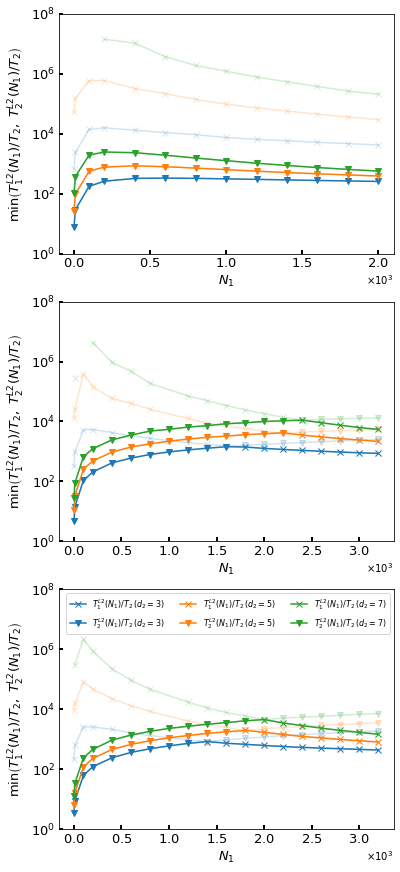

In [44]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

fig, axes = plt.subplots(3,1,figsize=(6,15))


# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=3,p=0.0005,eta=1000"

# ファイル名
file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=10000000,ver1" + ".csv"
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=10000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)
data1 = 2000*data1
data2 = 2000*data2

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes[0].plot(a, code_distance_list1[i]*(6*a+4*3+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes[0].plot(c, code_distance_list1[i]*(6*c+4*3+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        #b = np.array(data1.loc[code_distance_list1[i]])
        #axes.plot(a[9:], code_distance_list1[i]*(6*a[9:]+4*3+1)/b[9:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[0].plot(c, code_distance_list2[i]*(6*c+4*3+1)/d,marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        #axes.plot((c[8],a[9]), (code_distance_list1[i]*(6*c[8]+4*3+1)/d[8],code_distance_list1[i]*(6*a[9]+4*3+1)/b[9]),marker='',color = cm(i))
        print(code_distance_list2[i]*(6*c[5]+4*3+1)/d[5], code_distance_list2[i]*(6*c[5]+4*3+1)/d[5])
    if i == 1:
        #b = np.array(data1.loc[code_distance_list1[i]])
        #axes.plot(a[6:], code_distance_list1[i]*(6*a[6:]+4*3+1)/b[6:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[0].plot(c, code_distance_list2[i]*(6*c+4*3+1)/d,marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        #axes.plot((c[5],a[6]), (code_distance_list2[i]*(6*c[5]+4*3+1)/d[5],code_distance_list2[i]*(6*a[6]+4*3+1)/b[6]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[4]+4*3+1)/d[4], code_distance_list1[i]*(6*c[4]+4*3+1)/d[4])
    if i == 2:
        #b = np.array(data1.loc[code_distance_list1[i]])
        #axes.plot(a[2:], code_distance_list1[i]*(6*a[2:]+4*3+1)/b[2:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[0].plot(c, code_distance_list2[i]*(6*c+4*3+1)/d,marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        #axes.plot((c[1],a[2]), (code_distance_list2[i]*(6*c[1]+4*3+1)/d[1],code_distance_list2[i]*(6*a[2]+4*3+1)/b[2]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[3]+4*3+1)/d[3], code_distance_list1[i]*(6*c[3]+4*3+1)/d[3])
    
axes[0].xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes[0].ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes[0].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[0].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#axes.set_xticks(a)
#axes.set_xticklabels(a, rotation=45)
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
#axes.tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,2000)
#axes.set_xscale("log")
axes[0].set_yscale("log")


# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=5,p=0.0005,eta=1000"

# ファイル名
file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)
data1 = 2000*data1
data2 = 2000*data2

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)

cm = plt.get_cmap("tab10")

for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes[1].plot(a, code_distance_list1[i]*(6*a+4*5+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes[1].plot(c, code_distance_list1[i]*(6*c+4*5+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[1].plot(a[10:], code_distance_list1[i]*(6*a[10:]+4*5+1)/b[10:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[1].plot(c[:11], code_distance_list1[i]*(6*c[:11]+4*5+1)/d[:11],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes[1].plot((c[10],a[10]), (code_distance_list1[i]*(6*c[10]+4*5+1)/d[10],code_distance_list1[i]*(6*a[10]+4*5+1)/b[10]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[10]+4*5+1)/b[10], code_distance_list1[i]*(6*a[10]+4*5+1)/b[10]/(2*10**3))
        print(code_distance_list1[i]*(6*c+4*5+1)/d, code_distance_list1[i]*(6*c+4*5+1)/d)
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[1].plot(a[13:], code_distance_list1[i]*(6*a[13:]+4*5+1)/b[13:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[1].plot(c[:14], code_distance_list1[i]*(6*c[:14]+4*5+1)/d[:14],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes[1].plot((c[13],a[13]), (code_distance_list1[i]*(6*c[13]+4*5+1)/d[13],code_distance_list1[i]*(6*a[13]+4*5+1)/b[13]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[13]+4*5+1)/b[13], code_distance_list1[i]*(6*a[13]+4*5+1)/b[13]/(2*10**3))
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[1].plot(a[13:], code_distance_list1[i]*(6*a[13:]+4*5+1)/b[13:],marker='x',label=r"$X(d_2=$"+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[1].plot(c[:14], code_distance_list1[i]*(6*c[:14]+4*5+1)/d[:14],marker='v',label=r"$Z(d_2=$"+str(code_distance_list2[i])+")",color = cm(i))
        axes[1].plot((c[13],a[13]), (code_distance_list1[i]*(6*c[13]+4*5+1)/d[13],code_distance_list1[i]*(6*a[13]+4*5+1)/b[13]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[13]+4*5+1)/d[13], code_distance_list1[i]*(6*c[13]+4*5+1)/d[13]/(2*10**3))
        print(code_distance_list1[2]*(6*a[-1]+4*5+1)/b[-1]) # (7,5)

axes[1].set_xlabel(r'$N_1$', fontsize=13)
#axes[1].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes[1].xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes[1].ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes[1].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[1].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
# axes.spines["top"].set_linewidth(2)
# axes.spines["left"].set_linewidth(2)
# axes.spines["bottom"].set_linewidth(2)
# axes.spines["right"].set_linewidth(2)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=12)
#axes.set_title("lifetime", fontsize=14)
#axes.set_xlim(0,10000)
#axes.set_xscale("log")
axes[1].set_yscale("log")

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

################ 要変更 #################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/d1=7,p=0.0005,eta=1000"

# ファイル名
file1 = "X error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
file2 = "Z error,p=0.0005,d2=(3,7,2),eta=1000,trials=1000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data1 = pd.read_csv(file1, index_col=0)
data2 = pd.read_csv(file2, index_col=0)
data1 = 2000*data1
data2 = 2000*data2

# データフレームの行名(リスト)を取得
code_distance_list1 = data1.index
code_distance_list2 = data2.index

# データフレームの列名(リスト)を取得
round_list1 = data1.columns
round_list2 = data2.columns

##### グラフ作成 #####

a = np.array(round_list1)
a = [float(num) for num in a]
a = np.array(a)

c = np.array(round_list2)
c = [float(num) for num in c]
c = np.array(c)


cm = plt.get_cmap("tab10")

for i in range(len(code_distance_list1)):
    b = np.array(data1.loc[code_distance_list1[i]])
    axes[2].plot(a, code_distance_list1[i]*(6*a+4*7+1)/b,marker='x',color = cm(i),alpha=0.2)
    d = np.array(data2.loc[code_distance_list2[i]])
    axes[2].plot(c, code_distance_list1[i]*(6*c+4*7+1)/d,marker='v',color = cm(i),alpha=0.2)
    if i == 0:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[2].plot(a[8:], code_distance_list1[i]*(6*a[8:]+4*7+1)/b[8:],marker='x',label=r'$T^{L2}_{1}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[2].plot(c[:9], code_distance_list1[i]*(6*c[:9]+4*7+1)/d[:9],marker='v',label=r'$T^{L2}_{2}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list2[i])+")",color = cm(i))
        axes[2].plot((c[8],a[8]), (code_distance_list1[i]*(6*c[8]+4*7+1)/d[6],code_distance_list1[i]*(6*a[8]+4*7+1)/b[8]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[8]+4*7+1)/b[8], code_distance_list1[i]*(6*a[8]+4*7+1)/b[8]/(2*10**3))
        print(code_distance_list1[i]*(6*c[13]+4*7+1)/d[13], code_distance_list1[i]*(6*c[13]+4*7+1)/d[13]) # (5,3)
    if i == 1:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[2].plot(a[10:], code_distance_list1[i]*(6*a[10:]+4*7+1)/b[10:],marker='x',label=r'$T^{L2}_{1}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[2].plot(c[:11], code_distance_list1[i]*(6*c[:11]+4*7+1)/d[:11],marker='v',label=r'$T^{L2}_{2}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list2[i])+")",color = cm(i))
        axes[2].plot((c[10],a[10]), (code_distance_list1[i]*(6*c[10]+4*7+1)/d[10],code_distance_list1[i]*(6*a[10]+4*7+1)/b[10]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*c[9]+4*7+1)/d[9], code_distance_list1[i]*(6*c[9]+4*7+1)/d[9]/(2*10**3))
        print(code_distance_list1[i]*(6*c[-5]+4*7+1)/d[-5], code_distance_list1[i]*(6*c[-5]+4*7+1)/d[-5]/(2*10**3)) # (7,5)
    if i == 2:
        b = np.array(data1.loc[code_distance_list1[i]])
        axes[2].plot(a[11:], code_distance_list1[i]*(6*a[11:]+4*7+1)/b[11:],marker='x',label=r'$T^{L2}_{1}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list1[i])+")",color = cm(i))
        d = np.array(data2.loc[code_distance_list2[i]])
        axes[2].plot(c[:12], code_distance_list1[i]*(6*c[:12]+4*7+1)/d[:12],marker='v',label=r'$T^{L2}_{2}(N_{1})/T_{2} \, (d_2=$'+str(code_distance_list2[i])+")",color = cm(i))
        axes[2].plot((c[11],a[11]), (code_distance_list1[i]*(6*c[11]+4*7+1)/d[11],code_distance_list1[i]*(6*a[11]+4*7+1)/b[11]),marker='',color = cm(i))
        print(code_distance_list1[i]*(6*a[11]+4*7+1)/b[11], code_distance_list1[i]*(6*a[11]+4*7+1)/b[11])

#axes[2].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/\tau,\ T^{L2}_{2}(N_{1})/\tau\right)$', fontsize=13)
axes[2].xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) # x軸指数表記
axes[2].ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
axes[2].yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
axes[2].ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

axes[2].set_yscale("log")

axes[0].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/T_2,\ T^{L2}_{2}(N_{1})/T_2 \right)$', fontsize=13)
axes[1].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/T_2,\ T^{L2}_{2}(N_{1})/T_2 \right)$', fontsize=13)
axes[2].set_ylabel(r'$\min\left(T^{L2}_{1}(N_{1})/T_2,\ T^{L2}_{2}(N_{1})/T_2 \right)$', fontsize=13)

axes[0].set_xlabel(r'$N_1$', fontsize=13)
axes[1].set_xlabel(r'$N_1$', fontsize=13)
axes[2].set_xlabel(r'$N_1$', fontsize=13)

axes[0].tick_params(direction="in", width=2, length=4, labelsize=13)
axes[1].tick_params(direction="in", width=2, length=4, labelsize=13)
axes[2].tick_params(direction="in", width=2, length=4, labelsize=13)

axes[0].set_ylim(1,100000000)
axes[1].set_ylim(1,100000000)
axes[2].set_ylim(1,100000000)
plt.legend(ncol=3,fontsize=8)
plt.show()